In [8]:
import config
import torch
import torch.nn as nn
import numpy as np
import torch_model
from sklearn.neighbors import NearestNeighbors
import torchvision.transforms as T
import torchvision.transforms.functional as fn
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
#TEST_IMAGE_PATH = "../data/images/0a4cc29d-3687-4de5-912f-fdb92f0ba326.jpg"
TEST_IMAGE_PATH = "../data/images/0a4e92d2-c86f-47fc-b15b-82713958143c.jpg"
NUM_IMAGES = 10
ENCODER_MODEL_PATH = "../data/models/baseline_encoder.pt"
# ENCODER_MODEL_PATH = "../data/models/deep_encoder.pt"
EMBEDDING_PATH = "../data/models/data_embedding_f.npy"

IMG_HEIGHT = 512  
IMG_WIDTH = 512  


In [10]:
def load_image_tensor(image_path, device):
    image_tensor = T.ToTensor()(fn.resize(Image.open(image_path), size=[IMG_WIDTH, IMG_HEIGHT]))
    image_tensor = image_tensor.unsqueeze(0)
    print(image_tensor.shape)
    input_images = image_tensor.to(device)
    return image_tensor

In [11]:
def compute_similar_images(image_path, num_images, embedding, device):
    image_tensor = load_image_tensor(image_path, device)
    # image_tensor = image_tensor.to(device)

    with torch.no_grad():
        image_embedding = encoder(image_tensor).cpu().detach().numpy()

    print(image_embedding.shape)

    flattened_embedding = image_embedding.reshape((image_embedding.shape[0], -1))
    print(flattened_embedding.shape)

    knn = NearestNeighbors(n_neighbors=num_images, metric="cosine")
    knn.fit(embedding)

    _, indices = knn.kneighbors(flattened_embedding)
    indices_list = indices.tolist()
    print(indices_list)
    return indices_list


In [12]:
import glob
def plot_similar_images(indices_list):
    indices = indices_list[0]
    images = glob.glob(config.DATA_PATH +"*.jpg")
    for index in indices:
        # img_name = str(index - 1) + ".jpg"
        img_name = images[index - 1]
        # img_path = os.path.join(config.DATA_PATH + img_name)
        img_path = os.path.join(img_name)
        print(img_path)
        img = Image.open(img_path).convert("RGB")
        resize = fn.resize(img, size=[IMG_WIDTH, IMG_HEIGHT])
        plt.imshow(resize)
        plt.show()
        # img.save(f"../outputs/query_image_3/recommended_{index - 1}.jpg")

torch.Size([1, 3, 512, 512])
(1, 256, 16, 16)
(1, 65536)
[[3924, 161, 4656, 206, 3746, 3914, 4481, 3334, 1855, 93]]
../data/images/0a4e92d2-c86f-47fc-b15b-82713958143c.jpg


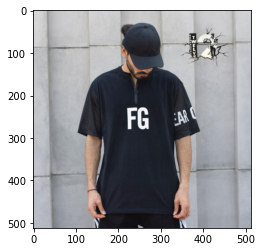

../data/images/21ec5184-e1a1-44eb-9e2f-3c1a26aee198.jpg


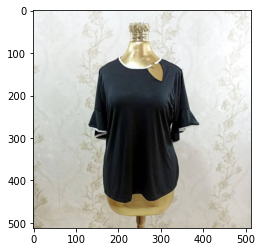

../data/images/85ccbf3e-b254-4fd2-8505-2975c7d403aa.jpg


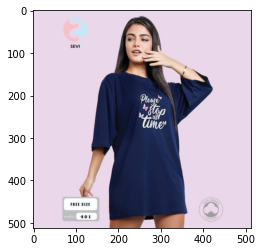

../data/images/0e4baf54-7472-482b-81c0-7ef89e93ff26.jpg


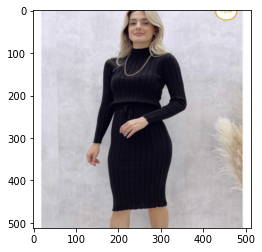

../data/images/094c23ab-487f-44d7-9847-515488881389.jpg


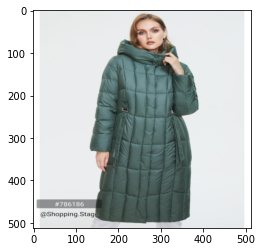

../data/images/5bb24b47-dc5a-4f59-9891-1f6d46de3fd8.jpg


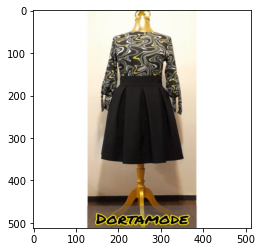

../data/images/7dac080e-2b9b-4849-9368-80d51e014544.jpg


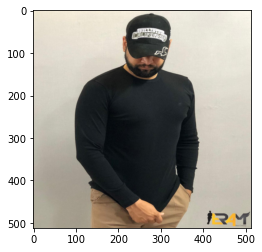

../data/images/2a9936aa-66e5-4476-bb44-64341e353938.jpg


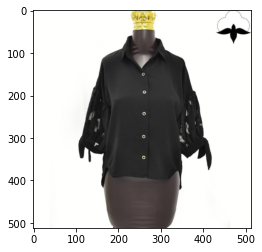

../data/images/0e67cbae-5465-499e-9fbe-e82cc11cd0e1.jpg


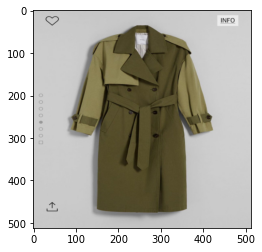

../data/images/7ad28bfe-3b7e-408b-a761-f964e0b7e40e.jpg


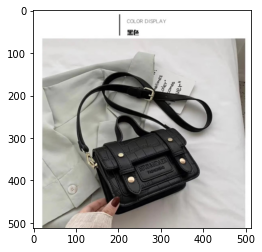

In [13]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
encoder = torch_model.ConvEncoder()

encoder.load_state_dict(torch.load(ENCODER_MODEL_PATH, map_location=device))
encoder.eval()
encoder.to(device)

# Loads the embedding
embedding = np.load(EMBEDDING_PATH)

indices_list = compute_similar_images(TEST_IMAGE_PATH, NUM_IMAGES, embedding, device)
plot_similar_images(indices_list)